In [3]:
import mne
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# mne.viz.set_browser_backend('qt')
#%matplotlib qt

In [4]:
project_path = "/project/def-emayada/q1k/experimental/HSJ/"
pylossless_path = "derivatives/pylossless/"
postproc_path = "derivatives/postproc/"

In [5]:
frontal_roi = ['E18','E19','E23','E24','E27','E3','E4','E10','E118','E123','E124']
common_freqs = {
    'delta' : (0,4),
    'theta': (4, 7),
    'alpha': (8, 12),
    'beta':(13, 30),
    'gamma': (30, 45)
}
epoch_files = glob.glob(project_path + pylossless_path + postproc_path + 'epoch_fif_files/RS/*epo.fif')


In [57]:
band_specific_map=[]
whole_group_eeg=[]
for filepath in epoch_files[8:40]:
    print(filepath)
    new_epoch = mne.read_epochs(filepath)
    epo_power= new_epoch.compute_psd(fmin=0,fmax=50)
    psds, freqs = epo_power.get_data(return_freqs=True)
    avg_psd =psds.mean(0)
    psd_df=pd.DataFrame(avg_psd)
    psd_df.columns=freqs
    psd_df.index=new_epoch.pick(picks=["eeg"]).ch_names
    group_psd_df=pd.DataFrame(psd_df.mean(0)).reset_index()
    group_psd_df.columns=["freqs","psd"]
    subject_id=filepath.split('/')[-1].split('-')[1].split('_')[0]
    if "P" in subject_id:
        diagnosis= "asd"
    else:
        diagnosis= "control"

    group_psd_df["subject"]=subject_id
    group_psd_df["diagnosis"]= diagnosis
    whole_group_eeg.append(group_psd_df)

    
    for band, (fmin, fmax) in common_freqs.items():
        psd_band=psd_df[psd_df.columns[(psd_df.columns>fmin) & (psd_df.columns<fmax)]].mean(1)
        psd_band=pd.DataFrame(psd_band)
        psd_band=psd_band.loc[frontal_roi]
        psd_band.columns=["psd"]
        psd_band["band"]=band
        psd_band["epoch_length"]=len(new_epoch)
        psd_band["subject"]=subject_id
        psd_band["diagnosis"]= diagnosis

        
        band_specific_map.append(psd_band)




/project/def-emayada/q1k/experimental/HSJ/derivatives/pylossless/derivatives/postproc/epoch_fif_files/RS/sub-15251057M1_ses-01_task-RS_run-1_eeg_epo.fif
Reading /project/def-emayada/q1k/experimental/HSJ/derivatives/pylossless/derivatives/postproc/epoch_fif_files/RS/sub-15251057M1_ses-01_task-RS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
234 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
/project/def-emayada/q1k/experimental/HSJ/derivatives/pylossless/derivatives/postproc/epoch_fif_files/RS/sub-100150M1_ses-01_task-RS_run-1_eeg_epo.fif
Reading /project/def-emayada/q1k/experimental/HSJ/derivatives/pylossless/derivatives/postproc/epoch_fif_files/RS/sub-100150M1_ses-01_task-RS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        

In [58]:
whole_group_eeg=pd.concat(whole_group_eeg)
whole_group_eeg

,freqs,psd,subject,diagnosis
0,0.000000,4.131588e-10,15251057M1,control
1,0.999001,8.037637e-10,15251057M1,control
2,1.998002,7.340126e-10,15251057M1,control
3,2.997003,5.688515e-10,15251057M1,control
4,3.996004,6.090187e-10,15251057M1,control
...,...,...,...,...
46,45.954046,5.071741e-11,15251080M1,control
47,46.953047,4.945058e-11,15251080M1,control
48,47.952048,4.850101e-11,15251080M1,control
49,48.951049,4.724417e-11,15251080M1,control


<Axes: xlabel='freqs', ylabel='psd'>

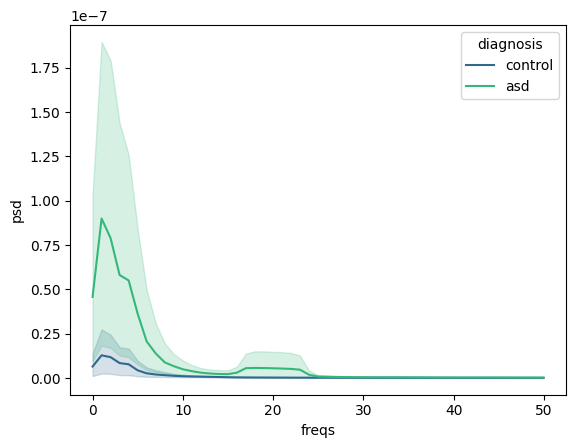

In [59]:
sns.lineplot(data=whole_group_eeg, x="freqs", y="psd", hue="diagnosis", palette= "viridis")

<Axes: xlabel='band', ylabel='psd'>

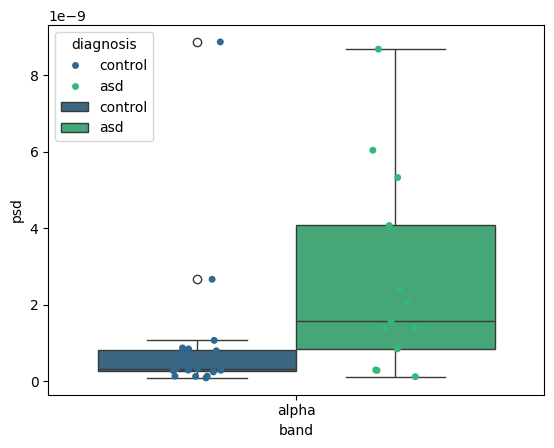

In [60]:
group_df=pd.concat(band_specific_map)
group_df=group_df.groupby(["band","subject","epoch_length","diagnosis"]).mean().reset_index()

sns.stripplot(data=group_df.loc[group_df.band=="alpha"], x="band", y="psd", hue="diagnosis",dodge=2,
              palette= "viridis")
sns.boxplot(data=group_df.loc[group_df.band=="alpha"], x="band", y="psd", hue="diagnosis",
            palette= "viridis")

In [ ]:
!jupyter nbconvert --output {"session_reports/group_half-trials_vp.html"} --TagRemovePreprocessor.remove_all_outputs_tags='{"exclude"}' --no-input --to html group_erp_tf_vp.ipynb